<a href="https://colab.research.google.com/github/MadsFolkmann/PredictWinner/blob/main/TilCHatten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score
from pickle import dump,load

In [32]:
dataFrame = pd.read_csv("/content/PremierLeague.csv")


In [33]:
dataFrame.head()

,MatchID,Season,MatchWeek,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,...,MarketMaxAwayTeam,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals,HomeTeamPoints,AwayTeamPoints
0,1993-1994_Arsenal_Coventry,1993-1994,1,1993-08-14,NaN,Arsenal,Coventry,0,3,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
1,1993-1994_Aston Villa_QPR,1993-1994,1,1993-08-14,NaN,Aston Villa,QPR,4,1,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
2,1993-1994_Chelsea_Blackburn,1993-1994,1,1993-08-14,NaN,Chelsea,Blackburn,1,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
3,1993-1994_Liverpool_Sheffield Weds,1993-1994,1,1993-08-14,NaN,Liverpool,Sheffield Weds,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
4,1993-1994_Man City_Leeds,1993-1994,1,1993-08-14,NaN,Man City,Leeds,1,1,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1


In [34]:
dataFrame['SeasonStartYear'] = dataFrame['Season'].apply(lambda x: int(x.split('-')[0]))
data_pre_2019 = dataFrame[dataFrame['SeasonStartYear'] < 2019]
data_post_2019 = dataFrame[dataFrame['SeasonStartYear'] >= 2019]
print("Pre-2019 dataset size:", data_pre_2019.shape)
print("Post-2019 dataset size:", data_post_2019.shape)

Pre-2019 dataset size: (9880, 44)
Post-2019 dataset size: (2099, 44)


In [35]:
data_post_2019

,MatchID,Season,MatchWeek,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,...,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals,HomeTeamPoints,AwayTeamPoints,SeasonStartYear
9880,2019-2020_Liverpool_Norwich,2019-2020,1,2019-08-09,20:00,Liverpool,Norwich,4,1,H,...,1.14,8.75,19.83,1.45,3.11,1.41,2.92,3,0,2019
9881,2019-2020_West Ham_Man City,2019-2020,1,2019-08-10,12:30,West Ham,Man City,0,5,A,...,11.84,6.28,1.25,1.51,2.77,1.48,2.65,0,3,2019
9882,2019-2020_Bournemouth_Sheffield United,2019-2020,1,2019-08-10,15:00,Bournemouth,Sheffield United,1,1,D,...,2.01,3.53,3.83,2.00,1.99,1.90,1.93,1,1,2019
9883,2019-2020_Burnley_Southampton,2019-2020,1,2019-08-10,15:00,Burnley,Southampton,3,0,H,...,2.68,3.22,2.78,2.20,1.78,2.12,1.73,3,0,2019
9884,2019-2020_Crystal Palace_Everton,2019-2020,1,2019-08-10,15:00,Crystal Palace,Everton,0,0,D,...,3.13,3.27,2.40,2.25,1.74,2.18,1.70,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11974,2024-2025_Fulham_Arsenal,2024-2025,15,2024-12-08,14:00,Fulham,Arsenal,1,1,D,...,5.40,4.24,1.61,1.84,2.17,1.78,2.06,1,1,2024
11975,2024-2025_Ipswich_Bournemouth,2024-2025,15,2024-12-08,14:00,Ipswich,Bournemouth,1,2,A,...,3.57,3.73,2.02,1.75,2.22,1.72,2.16,0,3,2024
11976,2024-2025_Leicester_Brighton,2024-2025,15,2024-12-08,14:00,Leicester,Brighton,2,2,D,...,4.48,4.02,1.75,1.63,2.44,1.59,2.39,1,1,2024
11977,2024-2025_Tottenham_Chelsea,2024-2025,15,2024-12-08,16:30,Tottenham,Chelsea,3,4,A,...,3.21,4.04,2.07,1.36,3.45,1.35,3.26,0,3,2024


In [36]:
data_post_2019.columns

Index(['MatchID', 'Season', 'MatchWeek', 'Date', 'Time', 'HomeTeam',
       'AwayTeam', 'FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals',
       'FullTimeResult', 'HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals',
       'HalfTimeResult', 'Referee', 'HomeTeamShots', 'AwayTeamShots',
       'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget', 'HomeTeamCorners',
       'AwayTeamCorners', 'HomeTeamFouls', 'AwayTeamFouls',
       'HomeTeamYellowCards', 'AwayTeamYellowCards', 'HomeTeamRedCards',
       'AwayTeamRedCards', 'B365HomeTeam', 'B365Draw', 'B365AwayTeam',
       'B365Over2.5Goals', 'B365Under2.5Goals', 'MarketMaxHomeTeam',
       'MarketMaxDraw', 'MarketMaxAwayTeam', 'MarketAvgHomeTeam',
       'MarketAvgDraw', 'MarketAvgAwayTeam', 'MarketMaxOver2.5Goals',
       'MarketMaxUnder2.5Goals', 'MarketAvgOver2.5Goals',
       'MarketAvgUnder2.5Goals', 'HomeTeamPoints', 'AwayTeamPoints',
       'SeasonStartYear'],
      dtype='object')

In [37]:
columns_to_remove = [ 'HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals',
       'HalfTimeResult', 'HomeTeamCorners',
       'AwayTeamCorners',
       'MarketMaxDraw', 'MarketMaxAwayTeam', 'MarketAvgHomeTeam',
       'MarketAvgDraw', 'MarketAvgAwayTeam', 'MarketMaxOver2.5Goals',
       'MarketMaxUnder2.5Goals', 'MarketAvgOver2.5Goals',
       'MarketAvgUnder2.5Goals','SeasonStartYear', 'MarketMaxHomeTeam', 'Date']

data_post_2019 = data_post_2019.drop(columns=columns_to_remove)

In [38]:
data_post_2019.columns

Index(['MatchID', 'Season', 'MatchWeek', 'Time', 'HomeTeam', 'AwayTeam',
       'FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals', 'FullTimeResult',
       'Referee', 'HomeTeamShots', 'AwayTeamShots', 'HomeTeamShotsOnTarget',
       'AwayTeamShotsOnTarget', 'HomeTeamFouls', 'AwayTeamFouls',
       'HomeTeamYellowCards', 'AwayTeamYellowCards', 'HomeTeamRedCards',
       'AwayTeamRedCards', 'B365HomeTeam', 'B365Draw', 'B365AwayTeam',
       'B365Over2.5Goals', 'B365Under2.5Goals', 'HomeTeamPoints',
       'AwayTeamPoints'],
      dtype='object')

In [39]:
data_post_2019.dropna(inplace=True)

In [40]:
data_for_x = data_post_2019.drop(columns=['FullTimeResult'])
X = data_for_x.iloc[ : , 2: ]
X

,MatchWeek,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,Referee,HomeTeamShots,AwayTeamShots,HomeTeamShotsOnTarget,...,AwayTeamYellowCards,HomeTeamRedCards,AwayTeamRedCards,B365HomeTeam,B365Draw,B365AwayTeam,B365Over2.5Goals,B365Under2.5Goals,HomeTeamPoints,AwayTeamPoints
9880,1,20:00,Liverpool,Norwich,4,1,M Oliver,15.0,12.0,7.0,...,2.0,0.0,0.0,1.14,10.00,19.00,1.40,3.00,3,0
9881,1,12:30,West Ham,Man City,0,5,M Dean,5.0,14.0,3.0,...,2.0,0.0,0.0,12.00,6.50,1.22,1.44,2.75,0,3
9882,1,15:00,Bournemouth,Sheffield United,1,1,K Friend,13.0,8.0,3.0,...,1.0,0.0,0.0,1.95,3.60,3.60,1.90,1.90,1,1
9883,1,15:00,Burnley,Southampton,3,0,G Scott,10.0,11.0,4.0,...,0.0,0.0,0.0,2.62,3.20,2.75,2.10,1.72,3,0
9884,1,15:00,Crystal Palace,Everton,0,0,J Moss,6.0,10.0,2.0,...,1.0,0.0,1.0,3.00,3.25,2.37,2.20,1.66,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11974,15,14:00,Fulham,Arsenal,1,1,C Kavanagh,2.0,12.0,2.0,...,2.0,0.0,0.0,5.00,4.33,1.60,1.80,2.00,1,1
11975,15,14:00,Ipswich,Bournemouth,1,2,M Salisbury,18.0,22.0,5.0,...,1.0,0.0,0.0,3.50,3.75,2.00,1.73,2.10,0,3
11976,15,14:00,Leicester,Brighton,2,2,S Attwell,10.0,16.0,3.0,...,2.0,0.0,0.0,4.50,3.80,1.73,1.57,2.38,1,1
11977,15,16:30,Tottenham,Chelsea,3,4,A Taylor,13.0,17.0,5.0,...,2.0,0.0,0.0,3.40,3.90,2.00,1.36,3.20,0,3


In [41]:
y = data_post_2019['FullTimeResult']
y

,FullTimeResult
9880,H
9881,A
9882,D
9883,H
9884,D
...,...
11974,D
11975,A
11976,D
11977,A


In [42]:
#Her laver vi tables til testning, 1 overordnet og så to med hjemme og udebane statistisk historik
test_tabel_1 = data_post_2019[[
    'MatchWeek', 'HomeTeam', 'AwayTeam', 'Time', 'Referee',
    'B365HomeTeam', 'B365Draw', 'B365AwayTeam',
    'B365Over2.5Goals', 'B365Under2.5Goals'
]]

# Beregn statistik for hjemmehold
home_stats = data_post_2019.groupby('HomeTeam').agg({
    'FullTimeHomeTeamGoals': 'mean',
    'HomeTeamShots': 'mean',
    'HomeTeamShotsOnTarget': 'mean',
    'HomeTeamFouls': 'mean',
    'HomeTeamYellowCards': 'mean',
    'HomeTeamRedCards': 'mean',
    'HomeTeamPoints': 'mean'
}).reset_index()

# Omdøb kolonner for at indikere, at de er for hjemmeholds gns stats
home_stats.rename(columns={
    'HomeTeam': 'Team',
    'FullTimeHomeTeamGoals': 'AvgHomeGoals',
    'HomeTeamShots': 'AvgHomeShots',
    'HomeTeamShotsOnTarget': 'AvgHomeShotsOnTarget',
    'HomeTeamFouls': 'AvgHomeFouls',
    'HomeTeamYellowCards': 'AvgHomeYellowCards',
    'HomeTeamRedCards': 'AvgHomeRedCards',
    'HomeTeamPoints': 'AvgHomePoints'
}, inplace=True)

# Beregn statistik for udehold
away_stats = data_post_2019.groupby('AwayTeam').agg({
    'FullTimeAwayTeamGoals': 'mean',
    'AwayTeamShots': 'mean',
    'AwayTeamShotsOnTarget': 'mean',
    'AwayTeamFouls': 'mean',
    'AwayTeamYellowCards': 'mean',
    'AwayTeamRedCards': 'mean',
    'AwayTeamPoints': 'mean'
}).reset_index()

# Omdøb kolonner for at indikere, at de er for udeholds gns stats
away_stats.rename(columns={
    'AwayTeam': 'Team',
    'FullTimeAwayTeamGoals': 'AvgAwayGoals',
    'AwayTeamShots': 'AvgAwayShots',
    'AwayTeamShotsOnTarget': 'AvgAwayShotsOnTarget',
    'AwayTeamFouls': 'AvgAwayFouls',
    'AwayTeamYellowCards': 'AvgAwayYellowCards',
    'AwayTeamRedCards': 'AvgAwayRedCards',
    'AwayTeamPoints': 'AvgAwayPoints'
}, inplace=True)



#Her sammensætter vi de to tabeller

#Merge hjemmebanestatistik ind for hjemmeholdet
test_tabel_1 = test_tabel_1.merge(home_stats, left_on='HomeTeam', right_on='Team', how='left')
# Fjern unødvendig 'Team'-kolonne efter merge
test_tabel_1.drop(columns=['Team'], inplace=True)

# Step 3: Merge udebanestatistik ind for udeholdet
test_tabel_1 = test_tabel_1.merge(away_stats, left_on='AwayTeam', right_on='Team', how='left')
# Fjern unødvendig 'Team'-kolonne efter merge
test_tabel_1.drop(columns=['Team'], inplace=True)

test_tabel_1

,MatchWeek,HomeTeam,AwayTeam,Time,Referee,B365HomeTeam,B365Draw,B365AwayTeam,B365Over2.5Goals,B365Under2.5Goals,...,AvgHomeYellowCards,AvgHomeRedCards,AvgHomePoints,AvgAwayGoals,AvgAwayShots,AvgAwayShotsOnTarget,AvgAwayFouls,AvgAwayYellowCards,AvgAwayRedCards,AvgAwayPoints
0,1,Liverpool,Norwich,20:00,M Oliver,1.14,10.00,19.00,1.40,3.00,...,1.257143,0.038095,2.400000,0.473684,9.526316,2.736842,9.342105,1.684211,0.052632,0.421053
1,1,West Ham,Man City,12:30,M Dean,12.00,6.50,1.22,1.44,2.75,...,1.590476,0.019048,1.485714,2.076923,16.596154,6.192308,8.740385,1.471154,0.057692,2.086538
2,1,Bournemouth,Sheffield United,15:00,K Friend,1.95,3.60,3.60,1.90,1.90,...,1.791045,0.059701,1.313433,0.684211,7.842105,2.491228,11.649123,2.052632,0.087719,0.596491
3,1,Burnley,Southampton,15:00,G Scott,2.62,3.20,2.75,2.10,1.72,...,1.513158,0.013158,1.013158,1.058140,11.441860,4.000000,11.779070,2.034884,0.034884,0.906977
4,1,Crystal Palace,Everton,15:00,J Moss,3.00,3.25,2.37,2.20,1.66,...,1.754717,0.047170,1.339623,0.961905,10.714286,3.457143,11.647619,2.066667,0.066667,1.019048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093,15,Fulham,Arsenal,14:00,C Kavanagh,5.00,4.33,1.60,1.80,2.00,...,1.852941,0.088235,1.250000,1.660377,12.169811,4.132075,9.933962,1.792453,0.113208,1.707547
2094,15,Ipswich,Bournemouth,14:00,M Salisbury,3.50,3.75,2.00,1.73,2.10,...,2.400000,0.100000,0.700000,1.194030,11.432836,3.895522,11.253731,2.179104,0.029851,0.985075
2095,15,Leicester,Brighton,14:00,S Attwell,4.50,3.80,1.73,1.57,2.38,...,1.372093,0.034884,1.476744,1.295238,12.161905,4.400000,10.561905,1.714286,0.095238,1.209524
2096,15,Tottenham,Chelsea,16:30,A Taylor,3.40,3.90,2.00,1.36,3.20,...,1.839623,0.056604,1.905660,1.698113,13.716981,4.952830,11.150943,1.981132,0.056604,1.603774


In [43]:
test_tabel_1 = pd.get_dummies(test_tabel_1)
test_tabel_1

,MatchWeek,B365HomeTeam,B365Draw,B365AwayTeam,B365Over2.5Goals,B365Under2.5Goals,AvgHomeGoals,AvgHomeShots,AvgHomeShotsOnTarget,AvgHomeFouls,...,Referee_R Welch,Referee_S Allison,Referee_S Attwell,Referee_S Barrott,Referee_S Hooper,Referee_S Scott,Referee_S Singh,Referee_T Bramall,Referee_T Harrington,Referee_T Robinson
0,1,1.14,10.00,19.00,1.40,3.00,2.333333,19.095238,6.942857,10.247619,...,False,False,False,False,False,False,False,False,False,False
1,1,12.00,6.50,1.22,1.44,2.75,1.571429,12.457143,4.428571,9.695238,...,False,False,False,False,False,False,False,False,False,False
2,1,1.95,3.60,3.60,1.90,1.90,1.208955,12.582090,4.313433,11.358209,...,False,False,False,False,False,False,False,False,False,False
3,1,2.62,3.20,2.75,2.10,1.72,0.986842,11.842105,3.815789,10.473684,...,False,False,False,False,False,False,False,False,False,False
4,1,3.00,3.25,2.37,2.20,1.66,1.226415,11.971698,4.028302,11.141509,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093,15,5.00,4.33,1.60,1.80,2.00,1.308824,13.029412,4.250000,10.617647,...,False,False,False,False,False,False,False,False,False,False
2094,15,3.50,3.75,2.00,1.73,2.10,0.800000,11.700000,3.600000,10.900000,...,False,False,False,False,False,False,False,False,False,False
2095,15,4.50,3.80,1.73,1.57,2.38,1.593023,12.104651,4.488372,10.755814,...,False,False,True,False,False,False,False,False,False,False
2096,15,3.40,3.90,2.00,1.36,3.20,1.981132,14.292453,5.424528,11.386792,...,False,False,False,False,False,False,False,False,False,False


In [44]:
X = pd.get_dummies(X)
X

,MatchWeek,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,HomeTeamShots,AwayTeamShots,HomeTeamShotsOnTarget,AwayTeamShotsOnTarget,HomeTeamFouls,AwayTeamFouls,HomeTeamYellowCards,...,Referee_R Welch,Referee_S Allison,Referee_S Attwell,Referee_S Barrott,Referee_S Hooper,Referee_S Scott,Referee_S Singh,Referee_T Bramall,Referee_T Harrington,Referee_T Robinson
9880,1,4,1,15.0,12.0,7.0,5.0,9.0,9.0,0.0,...,False,False,False,False,False,False,False,False,False,False
9881,1,0,5,5.0,14.0,3.0,9.0,6.0,13.0,2.0,...,False,False,False,False,False,False,False,False,False,False
9882,1,1,1,13.0,8.0,3.0,3.0,10.0,19.0,2.0,...,False,False,False,False,False,False,False,False,False,False
9883,1,3,0,10.0,11.0,4.0,3.0,6.0,12.0,0.0,...,False,False,False,False,False,False,False,False,False,False
9884,1,0,0,6.0,10.0,2.0,3.0,16.0,14.0,2.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11974,15,1,1,2.0,12.0,2.0,4.0,10.0,9.0,4.0,...,False,False,False,False,False,False,False,False,False,False
11975,15,1,2,18.0,22.0,5.0,6.0,9.0,13.0,2.0,...,False,False,False,False,False,False,False,False,False,False
11976,15,2,2,10.0,16.0,3.0,7.0,9.0,10.0,1.0,...,False,False,True,False,False,False,False,False,False,False
11977,15,3,4,13.0,17.0,5.0,8.0,17.0,11.0,2.0,...,False,False,False,False,False,False,False,False,False,False


In [45]:
y = pd.get_dummies(y)
y

,A,D,H
9880,False,False,True
9881,True,False,False
9882,False,True,False
9883,False,False,True
9884,False,True,False
...,...,...,...
11974,False,True,False
11975,True,False,False
11976,False,True,False
11977,True,False,False


In [46]:
X = X.values
y = y.values
test_tabel_1 = test_tabel_1.values

In [47]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
test_tabel_1 = scaler.fit_transform(test_tabel_1)

In [48]:
dump(scaler, open('scaler.pkl', 'wb'))

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42 )

In [52]:
model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(3,activation='softmax'))

adam = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [53]:
model.fit(X_train,y_train,epochs=100, verbose=1)

Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3521 - loss: 1.1309
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3450 - loss: 1.1205
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3511 - loss: 1.1084
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3816 - loss: 1.1088
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3903 - loss: 1.1042
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3886 - loss: 1.1007
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4004 - loss: 1.0975
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4036 - loss: 1.0943
Epoch 9/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4147 - loss: 1.0890
Epoch 10/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4178 - loss: 1.0896
Epoch 11/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3894 - loss: 1.0896
Epoch 12/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

<Axes: >

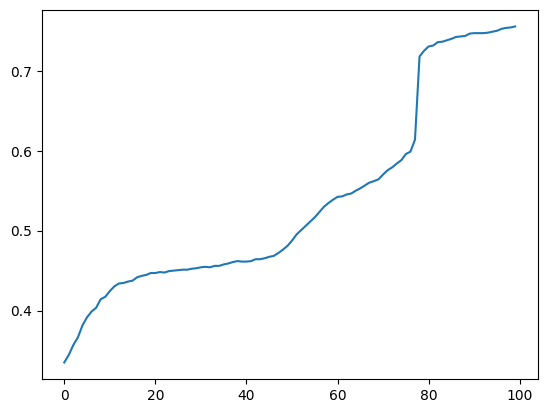

In [54]:
accuracy = model.history.history['accuracy']
sns.lineplot(x=range(len(accuracy)),y=accuracy)

<Axes: >

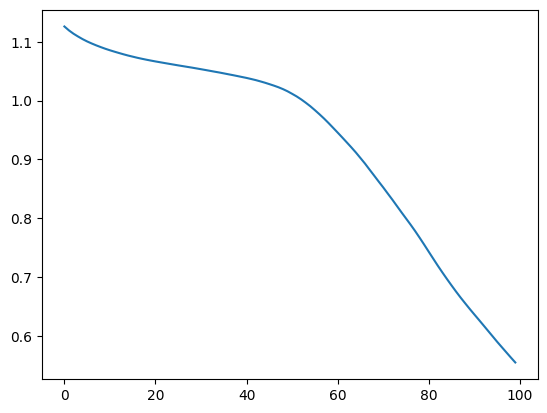

In [55]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)

In [56]:
model.evaluate(X_test,y_test,verbose=1)

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 2098
'y' sizes: 420
